### Computer Vision 1

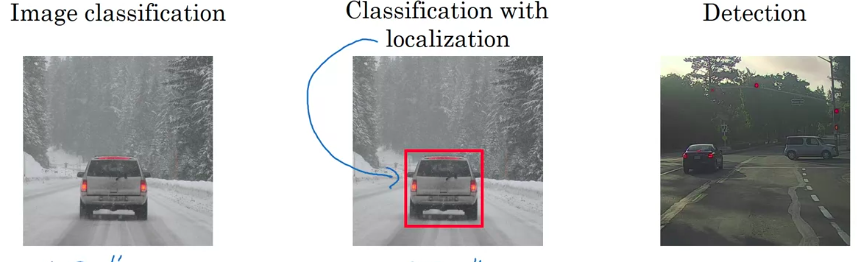
* Classification - classifying the entore image into classes             
* Classification with loacalization - in addition to a class label the neural network outputs dimentions of the bounding box araound the object.               
* Detection - detecting multiple objects in an image belonging to multiple classes and the bounding box arounfd the identified objects.           

#### Classification with Localization          
* The output of the neural network will be of the following form -                     
    * $y=[p_c, b_x, b_y, b_h, b_w, c_1, c_2, c_3, ....]$        
    * p_c - binary bit indicating if an object is present or not                
    
    * b_x - x coordinate of the center of the bounding box           
    * b_y - y coordinate of the center of the bounding box           
    * b_h - hieght of the bounding box                 
    * b_w - width of the bounding box               
    * c_1, c_2 ... - class label                                
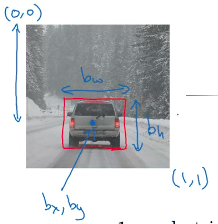                     
* To train such a neural network the training set should have the bounding boxes in the ground truth labels.              

#### Landmark Detection               
* Used to identify keypoints of an image. For example some keypoint around the eye of image of a person.              
* The neural network is tranied to output the coordinateds of the key points.                  
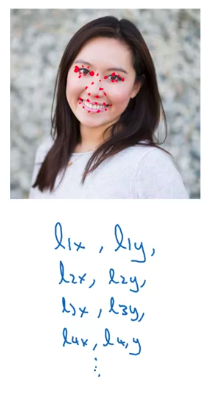

#### Sliding Window Detection              
* A window is passed/slidded through the image with a predefined stride. Each window is passed through a classifiaction network.                 
* Different sized and shaped windows are used to accurately capture objects in the window.           
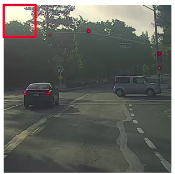 
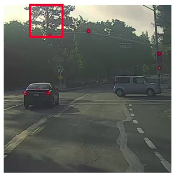
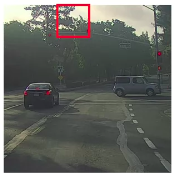
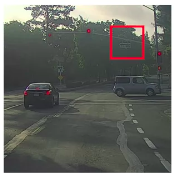
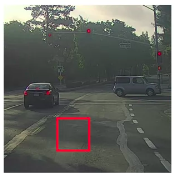
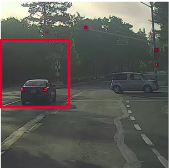                      
* Sliding window detection is very computationally expensive. 

### Convolution Implementation of Bounding Boxes             
* Convolution Neural Network last few layers are usually FC layers, these layers can be replaced using convolution layers with filter size eqivalent to the size of the previous convolution layers output volume.                 
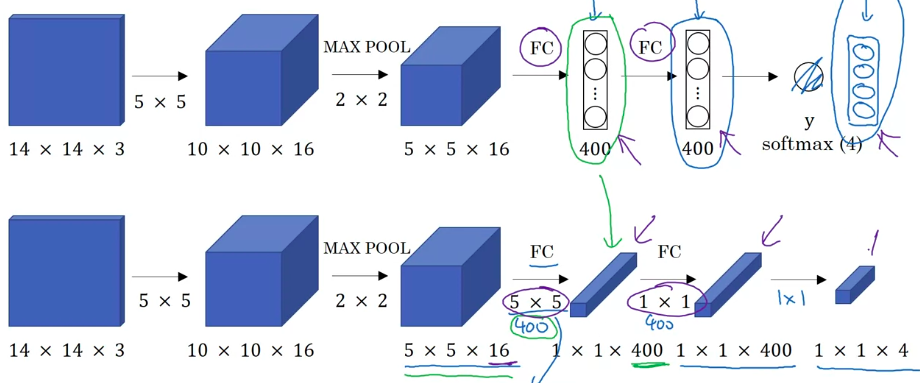                     
* Here the last few FC layers are converted to convolution layers.                        

### Convolution Implmentation of Sliding Window Detection            
* With all layers converted to convolution layers sliding window detection can be implemented using convolution, where the images need not to be sent through the same CNN multiple times for each crooped window.               
* Example -                      
* The below image gives the base CNN which used to classify each window with a window size of 14x14 and the image of size 16x16 where a stride of 2 is used to window the image. Then by using the classical technique 4 images will be cropped and sent trough the CNN 4 times.                                               
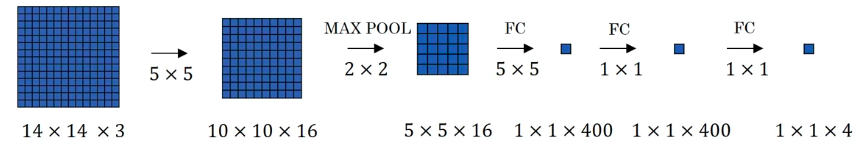                        
* Same result of the *sliding window technique* can be obtained by passing the entire image through the same CONV net at once.                       
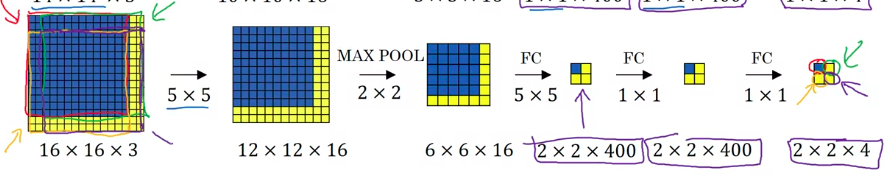             
* The last 2x2x4 volumes each block (1x1x4) represents the results each of the 4 cropped images by the window.              

### Bounding Box Predictions               
* The sliding window detection sometimes may not be able to properly detect the bounding box due to different shapes and positions of the bounding box.              
* Sliding window technique only uses a constant window shape          
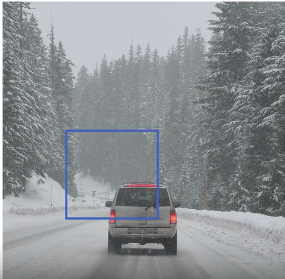
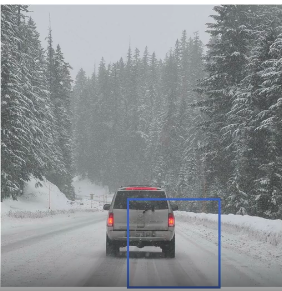             
### Object Detection                    
* YOLO - You Only Look for Once           
* Intitally, the image is divided into eqal sized segments and then an object detection with localization algorithm is applied to each segment.           
* The output of each segement will be in the following form - 
    * $y_i=[p_c, b_x, b_y, b_h, b_w, c_1, c_2, c_3, ....]$               
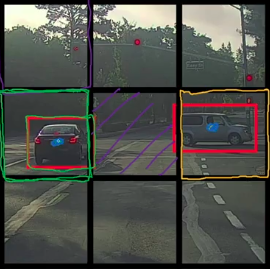                    
* If there arn't any objects $p_c$ will be zero and other parameters are not considered.                   
* $b_x, b_y$ are the center coordinates of the bouding box and the edge of each box will be (0 ,0) and (1, 1).                   
* $b_h, b_w$ are the hieght and width of the bouding box and is represented as a ratio of the size of the window and in some implementations $b_h , b_w$ can be greater than one where the bounding box is out of the selected window.                  
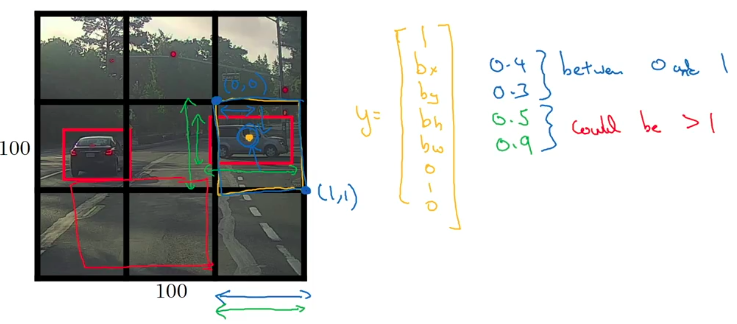            
* There are other parameterization techniques in addition to this method.           
* Even though a 3x3 grid is used in the above example a more fine grid must be used a 19x19 grid is a more common grid size.               
### Evaluating Object Localization (IOU)                    
* A common metric used for evluating object localization is *Intersection Over Union (IOU)*.                  
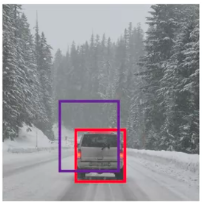
* Red box is the ground truth and the purple box is the predicted.                    
* IOU is calculated by dividing the area of the intersection of the predicted and ground truth bounding bix by  the area of the predicted bounding box.            
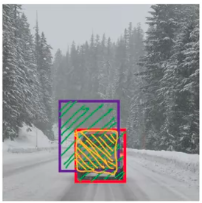 
* $IOU = \frac{yellow Area}{green Area}$.                
* If the IOU is greated than 0.5 the predicted bounding box can be classified as correct. 0.5 is not a fixed threshold eventhogh this value is used commonly. For more stringent measures values such as 0.6, 0.7 can be used.           
### Non Max Supression        
* When using object detection algorithms the same object may be detected multiple times by different grid squares.                         
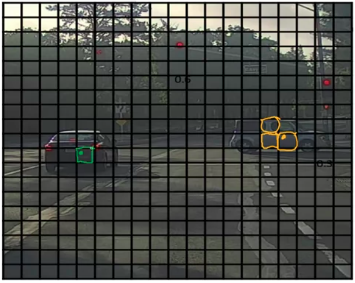 
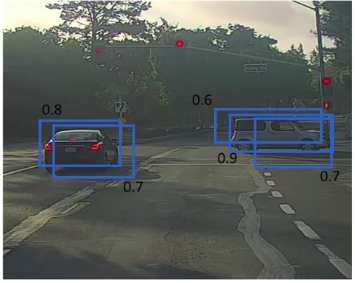   
* In the image above there are 5 bounding objects detected. The bounding boxes to output is selected by using non max supression.                 
* Non max supression works in a loop until all the bounding boxes reamning are the selected ones. How non max supression works is -                                   
    * Initially, all the bounding boxes with a $p_c$ value smaller than a certain threshold are discarded. ($p_c$ indicates the presense of an object in the grid cell)            
    * Next, the bounding box with the highest $p_c$ is selected.                     
    * Next, the bounding boxes having a high *IOU*  value with the selected bounding box will be supressed.                  
    * These steps are continoued in a loop until only the bounding boxes remaning are only the selected ones.                   
* When there are multiple classes to detect *Non Max Supression* should be carried out independently.            


### Anchor Boxes                      
* When there are multiple classes and the same grid cell might have two objects.                    
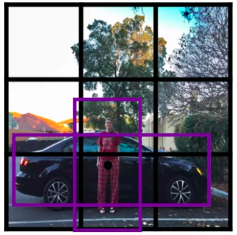      
* To train a model to detect multiple objects in the same grid cell the concept of *Anchor Boxes* can be used.                            
* Anchor boxes are bounding boxes with different shapes. About 5 different bounding boxes are used.                      
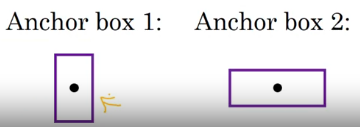                  
* Each grid cell will output a output vector for each anchor box. For example a if we use 2 anchor box the output will be of the form -                        
$y=[p_{c1}, b_{x1}, b_{y1}, b_{h1}, b_{w1}, c_{11}, c_{21}, c_{31}, ...., p_{c2}, b_{x2}, b_{y2}, b_{h2}, b_{w2}, c_{12}, c_{22}, c_{32}, ....]$                       
* Then the model is tranied to output such an output.             

## YOLO Algorithm                        
* YOLO  - You Only Look Once                          
* YOLO algorithm combines all the concepts of object classification with localization, non max supression and anchor boxes.                             
* **Traning** - the model is trained when given an image the model outputs a vector for each grid cell for each anchor box.                     
* **Prediction** - non max suppression is used at the prediction stage for each class.                            